In [7]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange

# Exercise 2.5

In [2]:
class TestBed:
    def __init__(self, rng, k=10, nonstationary=False):
        self.k = k
        self.rng = rng
        self.nonstationary = nonstationary
        self.arms = [self.rng.normal() for i in range(k)]
    
    def pull(self, a):
        r = self.rng.normal(self.arms[a])
        if self.nonstationary:
            self.arms = [a + self.rng.normal(0, 0.01) for a in self.arms]
        return r

In [3]:
def epsilon_greedy(bandit, T, epsilon, rng, step_size=None):
    rewards = []
    actions = []
    Q = np.zeros(bandit.k)
    N = np.zeros(bandit.k)

    for t in range(T):
        if rng.uniform() < epsilon:
            a = rng.integers(bandit.k)
        else:
            a = np.argmax(Q)
        r = bandit.pull(a)
        N[a] += 1
        alpha = step_size if step_size else 1/N[a]
        Q[a] += alpha * (r - Q[a])
        
        rewards.append(r)
        actions.append(a)
    
    return rewards, actions

In [143]:
E = [0, 0.01, 0.1]
N = 2000
T = 1000
avg_rewards = np.zeros((len(E), T))
best_action = np.zeros((len(E), T))
for i, epsilon in enumerate(E):
    rng = np.random.default_rng(42)
    rewards = np.zeros((N, T))
    actions = np.zeros((N, T), bool)
    for j in trange(N):
        bandit = TestBed(rng)
        r, a = epsilon_greedy(bandit, T, epsilon, rng)
        rewards[j] = np.array(r)
        actions[j] = np.array(a) == np.argmax(bandit.arms)
    avg_rewards[i] = rewards.mean(0)
    best_action[i] = actions.mean(0)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

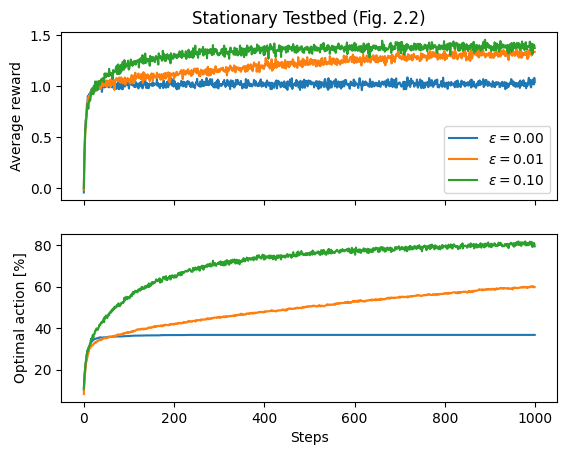

In [144]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].set_title("Stationary Testbed (Fig. 2.2)")
ax[-1].set_xlabel("Steps")
ax[0].set_ylabel("Average reward")
ax[1].set_ylabel("Optimal action [%]")
for i, epsilon in enumerate(E):
    ax[0].plot(avg_rewards[i], label=fr"$\varepsilon = {epsilon:.2f}$")
    ax[1].plot(best_action[i]*100)
ax[0].legend()
plt.show()

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

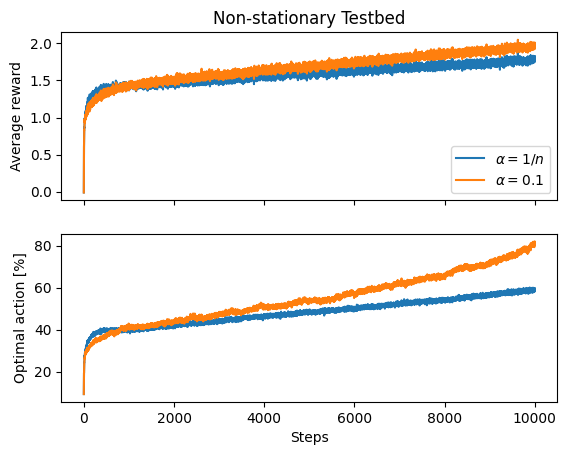

In [142]:
S = [None, 0.1]
N = 2000
T = 10_000
avg_rewards = np.zeros((len(E), T))
best_action = np.zeros((len(E), T))
for i, step_size in enumerate(S):
    rng = np.random.default_rng(42)
    rewards = np.zeros((N, T))
    actions = np.zeros((N, T), bool)
    for j in trange(N):
        bandit = TestBed(rng, nonstationary=True)
        r, a = epsilon_greedy(bandit, T, 0.1, rng, step_size)
        rewards[j] = np.array(r)
        actions[j] = np.array(a) == np.argmax(bandit.arms)
    avg_rewards[i] = rewards.mean(0)
    best_action[i] = actions.mean(0)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].set_title(r"Non-stationary Testbed")
ax[-1].set_xlabel("Steps")
ax[0].set_ylabel("Average reward")
ax[1].set_ylabel("Optimal action [%]")
for i, step_size in enumerate(S):
    if step_size is None:
        ax[0].plot(avg_rewards[i], label=fr"$\alpha = 1/n$")
    else:
        ax[0].plot(avg_rewards[i], label=fr"$\alpha = {step_size:.1f}$")
    ax[1].plot(best_action[i]*100)
ax[0].legend()
plt.show()

# Exercise 2.11

In [15]:
S = [0.01, 0.1, 1]
E = [0, 0.01, 0.1]
N = 100
T = 200_000
C = 100_000
perf = defaultdict(int)
for i, epsilon in enumerate(E):
    for j, step_size in enumerate(S):
        rng = np.random.default_rng(42)
        for k in trange(N):
            bandit = TestBed(rng, nonstationary=True)
            r, _ = epsilon_greedy(bandit, T, epsilon, rng, step_size)
            perf[(i, j)] += np.mean(r[C:])
        perf[(i, j)] /= N

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

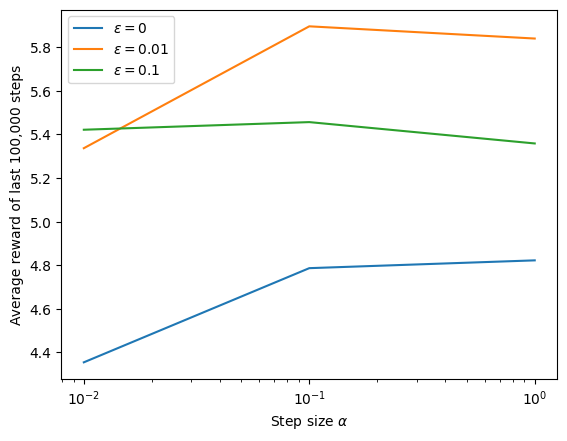

In [17]:
fig, ax = plt.subplots()
ax.set_ylabel("Average reward of last 100,000 steps")
ax.set_xlabel(r"Step size $\alpha$")
for i, epsilon in enumerate(E):
    ax.semilogx(S, [perf[(i, j)] for j in range(len(S))], label=f"$\epsilon = {epsilon}$")
ax.legend()